In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [2]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((b - a) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(b - a))

def minkowski_distance(a, b, p):
    return np.sum(((b - a) ** p) ** (1 / p))

In [3]:
class RN:
    def __init__(self, epsilon=1.0, verbose=False):
        self.epsilon = epsilon
        self.verbose = verbose

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes_ = np.unique(y)
        self.L = len(self.classes_)

    def predict(self, X_test, r):

       return [self.predict_class(x, r) for x in X_test]


    def predict_class(self, x, r):
        distances = np.linalg.norm(self.X_train - x, axis=1)

        noisy_counts = {}
        #Sensibildidade da contagem é 1
        scale = 1 / self.epsilon

        noisy_counts = {}

        for cls in self.classes_:
            count = np.sum((self.y_train == cls) & (distances <= r))
            noise = np.random.laplace(0, scale)
            noisy_counts[cls] = count + noise

        return max(noisy_counts, key=noisy_counts.get)


In [4]:
df = pd.read_csv("dados.preprocessados.csv")
X = df.drop('income', axis=1).values
y = df['income'].values
print(f"Shape de X: {X.shape}")

print(f"Shape de y: {y.shape}")

Shape de X: (45222, 77)
Shape de y: (45222,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Treino: X={X_train.shape}, y={y_train.shape}")
print(f"Teste: X={X_test.shape}, y={y_test.shape}")

Treino: X=(36177, 77), y=(36177,)
Teste: X=(9045, 77), y=(9045,)


In [ ]:
import numpy as np
from tqdm import tqdm

epsilons = [0.001,0.1 ,0.5, 1, 5, 10]
accs = []

for eps in tqdm(epsilons, desc="Testando valores de ε"):
    rn = RN(epsilon=eps)
    rn.fit(X_train, y_train)

    preds = rn.predict(X_test, r=6)
    preds = np.array(preds)

    acc = np.mean(preds == y_test)
    accs.append(acc)

    print(f"ε = {eps}: acurácia = {acc:.4f}")


Testando valores de ε:  17%|█▋        | 1/6 [03:13<16:08, 193.74s/it]

ε = 0.001: acurácia = 0.7289


Testando valores de ε:  33%|███▎      | 2/6 [06:20<12:37, 189.46s/it]

ε = 0.1: acurácia = 0.7647


Testando valores de ε:  50%|█████     | 3/6 [09:25<09:23, 187.73s/it]

ε = 0.5: acurácia = 0.7651


Testando valores de ε:  67%|██████▋   | 4/6 [12:29<06:12, 186.07s/it]

ε = 1: acurácia = 0.7650


Testando valores de ε:  83%|████████▎ | 5/6 [15:37<03:06, 186.93s/it]

ε = 5: acurácia = 0.7648


Testando valores de ε: 100%|██████████| 6/6 [18:44<00:00, 187.35s/it]

ε = 10: acurácia = 0.7648


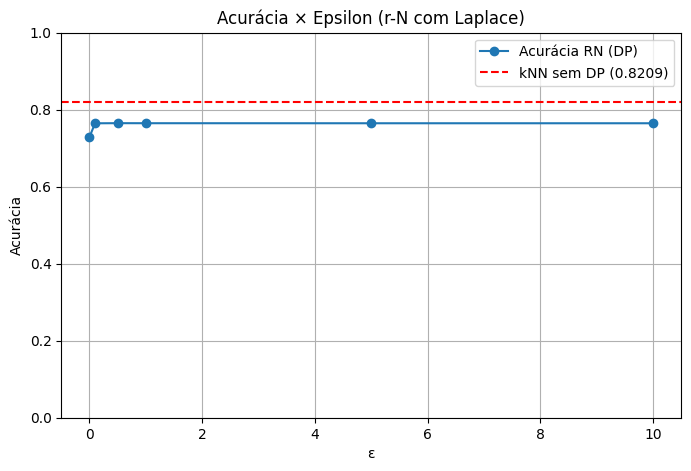

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(epsilons, accs, marker='o', label="Acurácia RN (DP)")
plt.axhline(0.8209, color='red', linestyle='--', label="kNN sem DP (0.8209)")
plt.xlabel("ε")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.title("Acurácia × Epsilon (r-N com Laplace)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# valores de r para testar
r_values = [1, 2, 4, 6, 8, 10]
epsilon_constante = 1.0

acuracias_r = []

print("Variação do raio r:")

for r in tqdm(r_values, desc="Testando valores de r"):

    rn = RN(epsilon=epsilon_constante, verbose=False)
    rn.fit(X_train, y_train)

    pred_scores = rn.predict(X_test, r)
    pred_labels = np.array(pred_scores)

    acuracia = np.mean(pred_labels == y_test)
    acuracias_r.append(acuracia)

    print(f"r = {r}: acurácia = {acuracia:.4f}")

Variação do raio r:


Testando valores de r:  17%|█▋        | 1/6 [03:13<16:08, 193.73s/it]

r = 1: acurácia = 0.6944


Testando valores de r:  33%|███▎      | 2/6 [06:24<12:47, 191.87s/it]

r = 2: acurácia = 0.8082


Testando valores de r:  50%|█████     | 3/6 [09:36<09:35, 191.86s/it]

r = 4: acurácia = 0.7925


Testando valores de r:  67%|██████▋   | 4/6 [12:46<06:22, 191.16s/it]

r = 6: acurácia = 0.7648


Testando valores de r:  83%|████████▎ | 5/6 [15:56<03:11, 191.00s/it]

r = 8: acurácia = 0.7521


Testando valores de r: 100%|██████████| 6/6 [19:11<00:00, 191.85s/it]

r = 10: acurácia = 0.7521


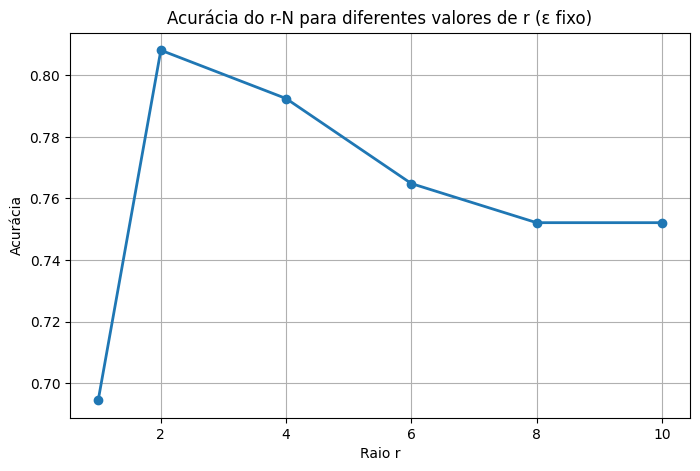

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(r_values, acuracias_r, marker='o', linewidth=2)
plt.title("Acurácia do r-N para diferentes valores de r (ε fixo)")
plt.xlabel("Raio r")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()


In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# valores de r para testar
r_values = [1, 2, 4, 6, 8, 10]
epsilon_constante = 0.1

acuracias_r = []

print("Variação do raio r:")

for r in tqdm(r_values, desc="Testando valores de r"):

    rn = RN(epsilon=epsilon_constante, verbose=False)
    rn.fit(X_train, y_train)

    pred_scores = rn.predict(X_test, r)
    pred_labels = np.array(pred_scores)

    acuracia = np.mean(pred_labels == y_test)
    acuracias_r.append(acuracia)

    print(f"r = {r}: acurácia = {acuracia:.4f}")

Variação do raio r:


Testando valores de r:  17%|█▋        | 1/6 [03:08<15:44, 188.86s/it]

r = 1: acurácia = 0.5944


Testando valores de r:  33%|███▎      | 2/6 [06:15<12:31, 187.84s/it]

r = 2: acurácia = 0.7663


Testando valores de r:  50%|█████     | 3/6 [09:22<09:22, 187.46s/it]

r = 4: acurácia = 0.7927


Testando valores de r:  67%|██████▋   | 4/6 [12:28<06:13, 186.67s/it]

r = 6: acurácia = 0.7650


Testando valores de r:  83%|████████▎ | 5/6 [15:33<03:06, 186.05s/it]

r = 8: acurácia = 0.7520


Testando valores de r: 100%|██████████| 6/6 [18:43<00:00, 187.19s/it]

r = 10: acurácia = 0.7520


#### Agora aqui ta nice!

<input type="checkbox"  >A consulta pode ser insensivel por conta do raio<br>
<input type="checkbox"  > Aplicacao do ruido é feito a cada consulta, ou seja o consumo de EPSILON É DIFERENTE!<br>
<input type="checkbox"  >O argmax é calculado por fora<br>
<input type="checkbox"  >O próximo trabalho vai usar a mesma base de laplace para aplicar ruido exponencial<br>

In [6]:
pred_scores = rn.predict(X_test, 6)

pred_labels = [max(scores, key=scores.get) for scores in pred_scores]

accuracy = np.mean(np.array(pred_labels) == y_test)


NameError: name 'rn' is not defined

In [7]:
def rn_noisy_counts(X_train, y_train, x_test_instance, r, epsilon_total):
  classes = np.unique(y_train)

  L = len(classes)
  eps_per_class = epsilon_total / L
  scale_laplace = 1 / eps_per_class
  distances = np.linalg.norm(X_train - x_test_instance, axis=1)


  noisy_counts = {}

  for cls in classes:
    count = np.sum((y_train == cls) & (distances <= r))
    noise = np.random.laplace(0, scale=scale_laplace)

    noisy_counts[cls] = count + noise

  return noisy_counts

In [8]:
all_noisy_counts = []
for x_instance in X_test:
    noisy_counts_for_instance = rn_noisy_counts(X_train, y_train, x_instance, 6, 1)
    all_noisy_counts.append(noisy_counts_for_instance)

# To get the predicted labels, you can then do:
pred_labels = [max(counts, key=counts.get) for counts in all_noisy_counts]

# You can also calculate accuracy:
accuracy = np.mean(np.array(pred_labels) == y_test)
print(f"Accuracy with rn_noisy_counts: {accuracy:.4f}")

KeyboardInterrupt: 

In [ ]:
epsilons = [0.5, 1, 5, 10]
accs_noisy_counts_r6 = []

for eps in tqdm(epsilons, desc="Testando valores de ε (rn_noisy_counts, r=6)"):
    all_noisy_counts = []
    for x_instance in X_test:
        noisy_counts_for_instance = rn_noisy_counts(X_train, y_train, x_instance, r=6, epsilon_total=eps)
        all_noisy_counts.append(noisy_counts_for_instance)

    pred_labels = [max(counts, key=counts.get) for counts in all_noisy_counts]
    accuracy = np.mean(np.array(pred_labels) == y_test)
    accs_noisy_counts_r6.append(accuracy)

    print(f"ε = {eps}: acurácia = {accuracy:.4f}")

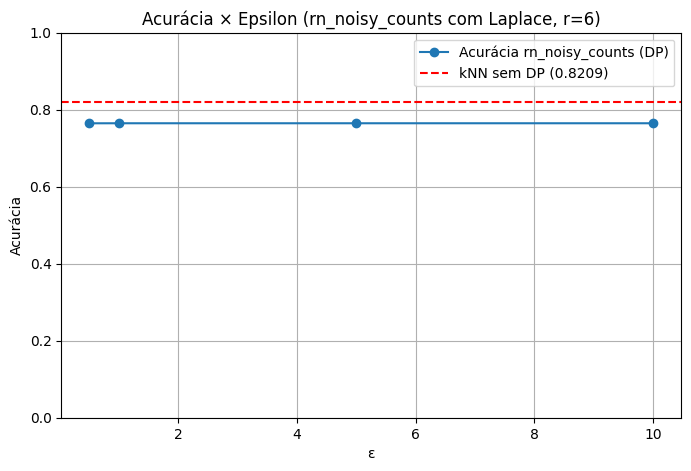

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(epsilons, accs_noisy_counts_r6, marker='o', label="Acurácia rn_noisy_counts (DP)")
plt.axhline(0.8209, color='red', linestyle='--', label="kNN sem DP (0.8209)") # Assuming this baseline is still relevant
plt.xlabel("ε")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.title("Acurácia × Epsilon (rn_noisy_counts com Laplace, r=6)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
epsilons = [0.5, 1, 5, 10]
accs_noisy_counts_r6 = []

for eps in tqdm(epsilons, desc="Testando valores de ε (rn_noisy_counts, r=6)"):
    all_noisy_counts = []
    for x_instance in X_test:
        noisy_counts_for_instance = rn_noisy_counts(X_train, y_train, x_instance, r=2, epsilon_total=eps)
        all_noisy_counts.append(noisy_counts_for_instance)

    pred_labels = [max(counts, key=counts.get) for counts in all_noisy_counts]
    accuracy = np.mean(np.array(pred_labels) == y_test)
    accs_noisy_counts_r6.append(accuracy)

    print(f"ε = {eps}: acurácia = {accuracy:.4f}")

Testando valores de ε (rn_noisy_counts, r=6):  25%|██▌       | 1/4 [01:25<04:15, 85.32s/it]

ε = 0.5: acurácia = 0.7866


Testando valores de ε (rn_noisy_counts, r=6):  50%|█████     | 2/4 [02:49<02:49, 84.93s/it]

ε = 1: acurácia = 0.7980


Testando valores de ε (rn_noisy_counts, r=6):  75%|███████▌  | 3/4 [04:13<01:24, 84.44s/it]

ε = 5: acurácia = 0.8124


Testando valores de ε (rn_noisy_counts, r=6): 100%|██████████| 4/4 [05:37<00:00, 84.42s/it]

ε = 10: acurácia = 0.8132


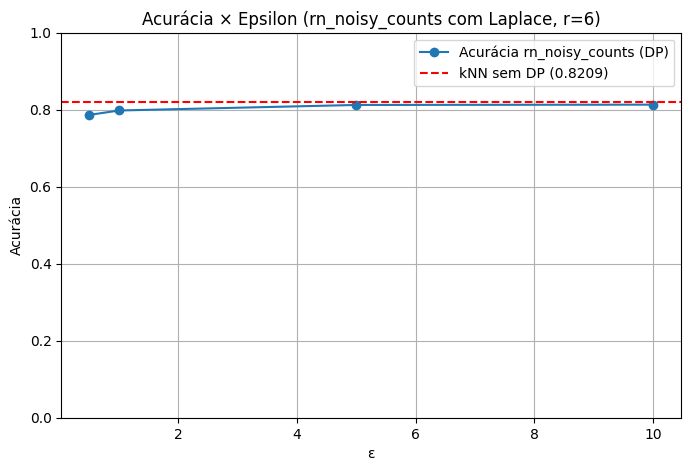

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(epsilons, accs_noisy_counts_r6, marker='o', label="Acurácia rn_noisy_counts (DP)")
plt.axhline(0.8209, color='red', linestyle='--', label="kNN sem DP (0.8209)") # Assuming this baseline is still relevant
plt.xlabel("ε")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.title("Acurácia × Epsilon (rn_noisy_counts com Laplace, r=6)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
epsilons = [0.001,0.1,0.5, 1, 5, 10]
accs_noisy_counts_r6 = []

for eps in tqdm(epsilons, desc="Testando valores de ε (rn_noisy_counts, r=2)"):
    all_noisy_counts = []
    for x_instance in X_test:
        noisy_counts_for_instance = rn_noisy_counts(X_train, y_train, x_instance, r=2, epsilon_total=eps)
        all_noisy_counts.append(noisy_counts_for_instance)

    pred_labels = [max(counts, key=counts.get) for counts in all_noisy_counts]
    accuracy = np.mean(np.array(pred_labels) == y_test)
    accs_noisy_counts_r6.append(accuracy)

    print(f"ε = {eps}: acurácia = {accuracy:.4f}")

Testando valores de ε (rn_noisy_counts, r=2):  17%|█▋        | 1/6 [01:31<07:38, 91.79s/it]

ε = 0.001: acurácia = 0.5040


Testando valores de ε (rn_noisy_counts, r=2):  33%|███▎      | 2/6 [03:01<06:02, 90.72s/it]

ε = 0.1: acurácia = 0.7375


Testando valores de ε (rn_noisy_counts, r=2):  50%|█████     | 3/6 [04:29<04:27, 89.25s/it]

ε = 0.5: acurácia = 0.7900


Testando valores de ε (rn_noisy_counts, r=2):  67%|██████▋   | 4/6 [05:56<02:56, 88.31s/it]

ε = 1: acurácia = 0.7994


Testando valores de ε (rn_noisy_counts, r=2):  83%|████████▎ | 5/6 [07:22<01:27, 87.64s/it]

ε = 5: acurácia = 0.8119


Testando valores de ε (rn_noisy_counts, r=2): 100%|██████████| 6/6 [08:49<00:00, 88.24s/it]

ε = 10: acurácia = 0.8118


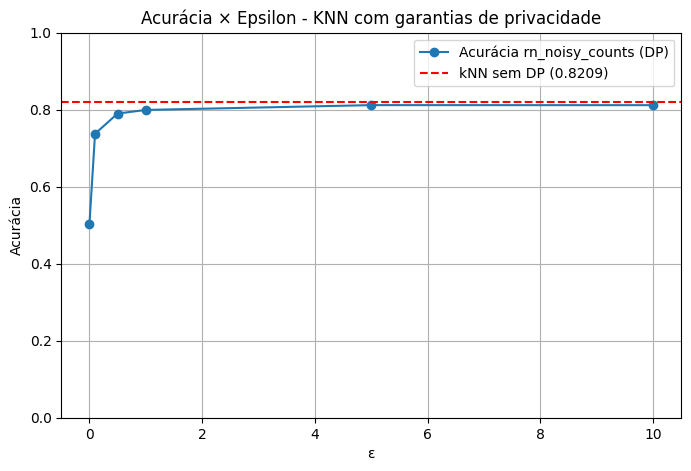

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(epsilons, accs_noisy_counts_r6, marker='o', label="Acurácia rn_noisy_counts (DP)")
plt.axhline(0.8209, color='red', linestyle='--', label="kNN sem DP (0.8209)") # Assuming this baseline is still relevant
plt.xlabel("ε")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.title("Acurácia × Epsilon - KNN com garantias de privacidade")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np

def rn_private_predict(
    X_train, y_train, X_test, r, epsilon
):
    """
    Implementação do Algoritmo 1 com:
    - Laplace
    - composição sequencial (divide por L)
    - divisão adicional pelo número de elementos da classe (n_i)
    - retorno das contagens ruidosas por ponto
    """

    classes = np.unique(y_train)
    L = len(classes)

    # número de elementos de cada classe
    class_counts = {c: np.sum(y_train == c) for c in classes}

    results = []

    for x in X_test:

        # distâncias
        dist = np.linalg.norm(X_train - x, axis=1)

        noisy_counts = {}

        for c in classes:

            # contagem real dentro do raio
            real_count = np.sum((y_train == c) & (dist <= r))

            # composição sequencial EXTENDIDA
            eps_prime = epsilon / (L * class_counts[c])

            # Laplace scale
            scale = 1 / eps_prime  # = L * n_i / epsilon

            # ruído
            noise = np.random.laplace(0, scale)

            noisy_counts[c] = real_count + noise

        results.append(noisy_counts)

    return results


In [10]:
def plotar_resultados(y_test, y_pred):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    axes[0].bar(['Acertos', 'Erros'],
                [np.sum(y_test == y_pred), np.sum(y_test != y_pred)],
                color=['green', 'red'])
    axes[0].set_title('Distribuição de Acertos e Erros')
    axes[0].set_ylabel('Quantidade')

    acuracia = np.mean(y_test == y_pred)
    axes[1].bar(['Acurácia'], [acuracia], color='blue')
    axes[1].set_ylim([0, 1])
    axes[1].set_title(f'Acurácia: {acuracia:.2%}')
    axes[1].set_ylabel('Percentual')

    tp = np.sum((y_test == 1) & (y_pred == 1))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    fn = np.sum((y_test == 1) & (y_pred == 0))

    matriz = [[tn, fp], [fn, tp]]
    im = axes[2].imshow(matriz, cmap='Blues')
    axes[2].set_title('Matriz de Confusão')
    axes[2].set_xticks([0, 1])
    axes[2].set_yticks([0, 1])
    axes[2].set_xticklabels(['Pred 0', 'Pred 1'])
    axes[2].set_yticklabels(['Real 0', 'Real 1'])

    for i in range(2):
        for j in range(2):
            axes[2].text(j, i, matriz[i][j],
                        ha='center', va='center', color='black', fontsize=12)

    plt.tight_layout()
    plt.show()

    return acuracia



Executando RN-PD...


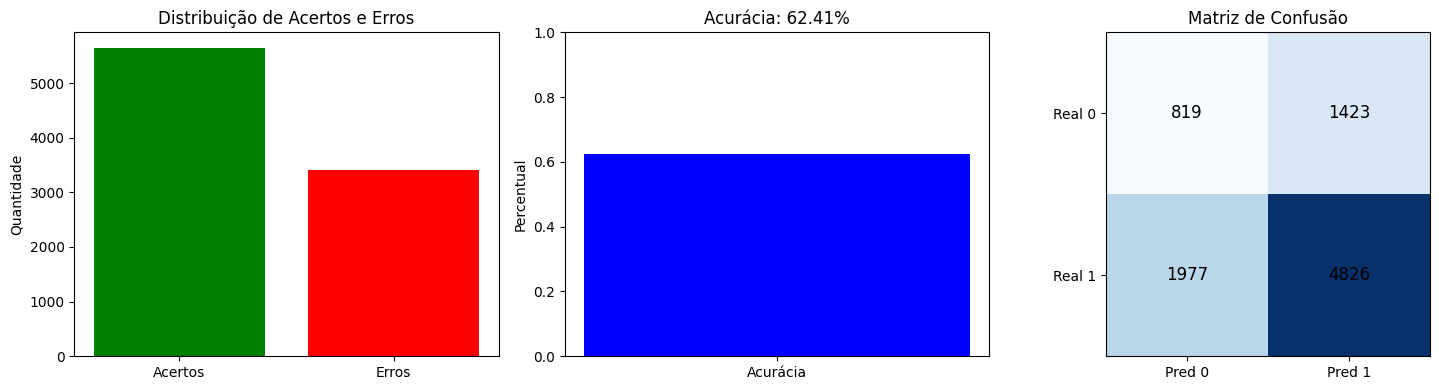

Acurácia final com ε=10: 0.6241


In [13]:
epsilon = 10
r = 6

print("Executando RN-PD...")

noisy_scores = rn_private_predict(X_train, y_train, X_test, r, epsilon)

y_pred = np.array([max(scores, key=scores.get) for scores in noisy_scores])

acuracia = plotar_resultados(y_test, y_pred)

print(f"Acurácia final com ε={epsilon}: {acuracia:.4f}")

In [14]:
def rn_predict_labels(X_train, y_train, X_test, r, epsilon):
    """
    Retorna apenas os rótulos preditos (argmax),
    usando a função rn_private_predict que retorna contagens ruidosas.
    """
    noisy_vectors = rn_private_predict(X_train, y_train, X_test, r, epsilon)
    preds = [max(scores, key=scores.get) for scores in noisy_vectors]
    return np.array(preds)


In [15]:
from tqdm import tqdm
import matplotlib.pyplot as plt

epsilons = [0.001, 0.1, 1.5, 2, 5, 7, 10]
accuracies = []

print("Testando valores de ε:\n")

for eps in tqdm(epsilons, desc="Varredura de ε"):

    preds = rn_predict_labels(X_train, y_train, X_test, r=6, epsilon=eps)
    acc = np.mean(preds == y_test)

    accuracies.append(acc)
    print(f"ε = {eps}: acurácia = {acc:.4f}")


Testando valores de ε:



Varredura de ε:  14%|█▍        | 1/7 [02:16<13:39, 136.52s/it]

ε = 0.001: acurácia = 0.4992


Varredura de ε:  29%|██▊       | 2/7 [04:12<10:23, 124.62s/it]

ε = 0.1: acurácia = 0.4968


Varredura de ε:  43%|████▎     | 3/7 [06:09<08:04, 121.23s/it]

ε = 1.5: acurácia = 0.5195


Varredura de ε:  57%|█████▋    | 4/7 [08:07<05:58, 119.64s/it]

ε = 2: acurácia = 0.5330


Varredura de ε:  71%|███████▏  | 5/7 [10:03<03:56, 118.45s/it]

ε = 5: acurácia = 0.5830


Varredura de ε:  86%|████████▌ | 6/7 [11:58<01:57, 117.26s/it]

ε = 7: acurácia = 0.5935


Varredura de ε: 100%|██████████| 7/7 [13:53<00:00, 119.02s/it]

ε = 10: acurácia = 0.6332


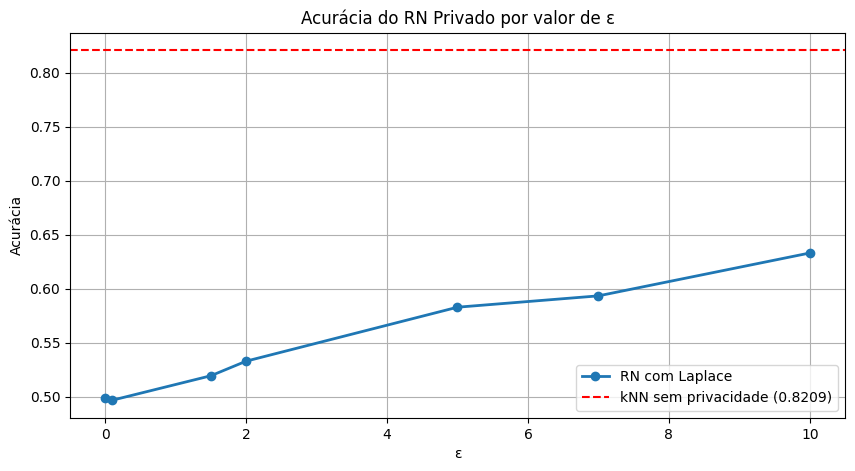

In [16]:
plt.figure(figsize=(10,5))
plt.plot(epsilons, accuracies, marker='o', linewidth=2, label='RN com Laplace')
plt.axhline(0.8209, color='red', linestyle='--', label='kNN sem privacidade (0.8209)')

plt.xlabel("ε")
plt.ylabel("Acurácia")
plt.title("Acurácia do RN Privado por valor de ε")
plt.legend()
plt.grid(True)
plt.show()
